In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
file_path = '/kaggle/input/fraud-detection/isFraud_Cleaned.csv'
data = pd.read_csv(file_path)
data.columns
import warnings
warnings.filterwarnings("ignore")


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28000 non-null  int64  
 1   type            28000 non-null  int64  
 2   amount          28000 non-null  float64
 3   oldbalanceOrg   28000 non-null  float64
 4   newbalanceOrig  28000 non-null  float64
 5   oldbalanceDest  28000 non-null  float64
 6   newbalanceDest  28000 non-null  float64
 7   isFraud         28000 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.7 MB


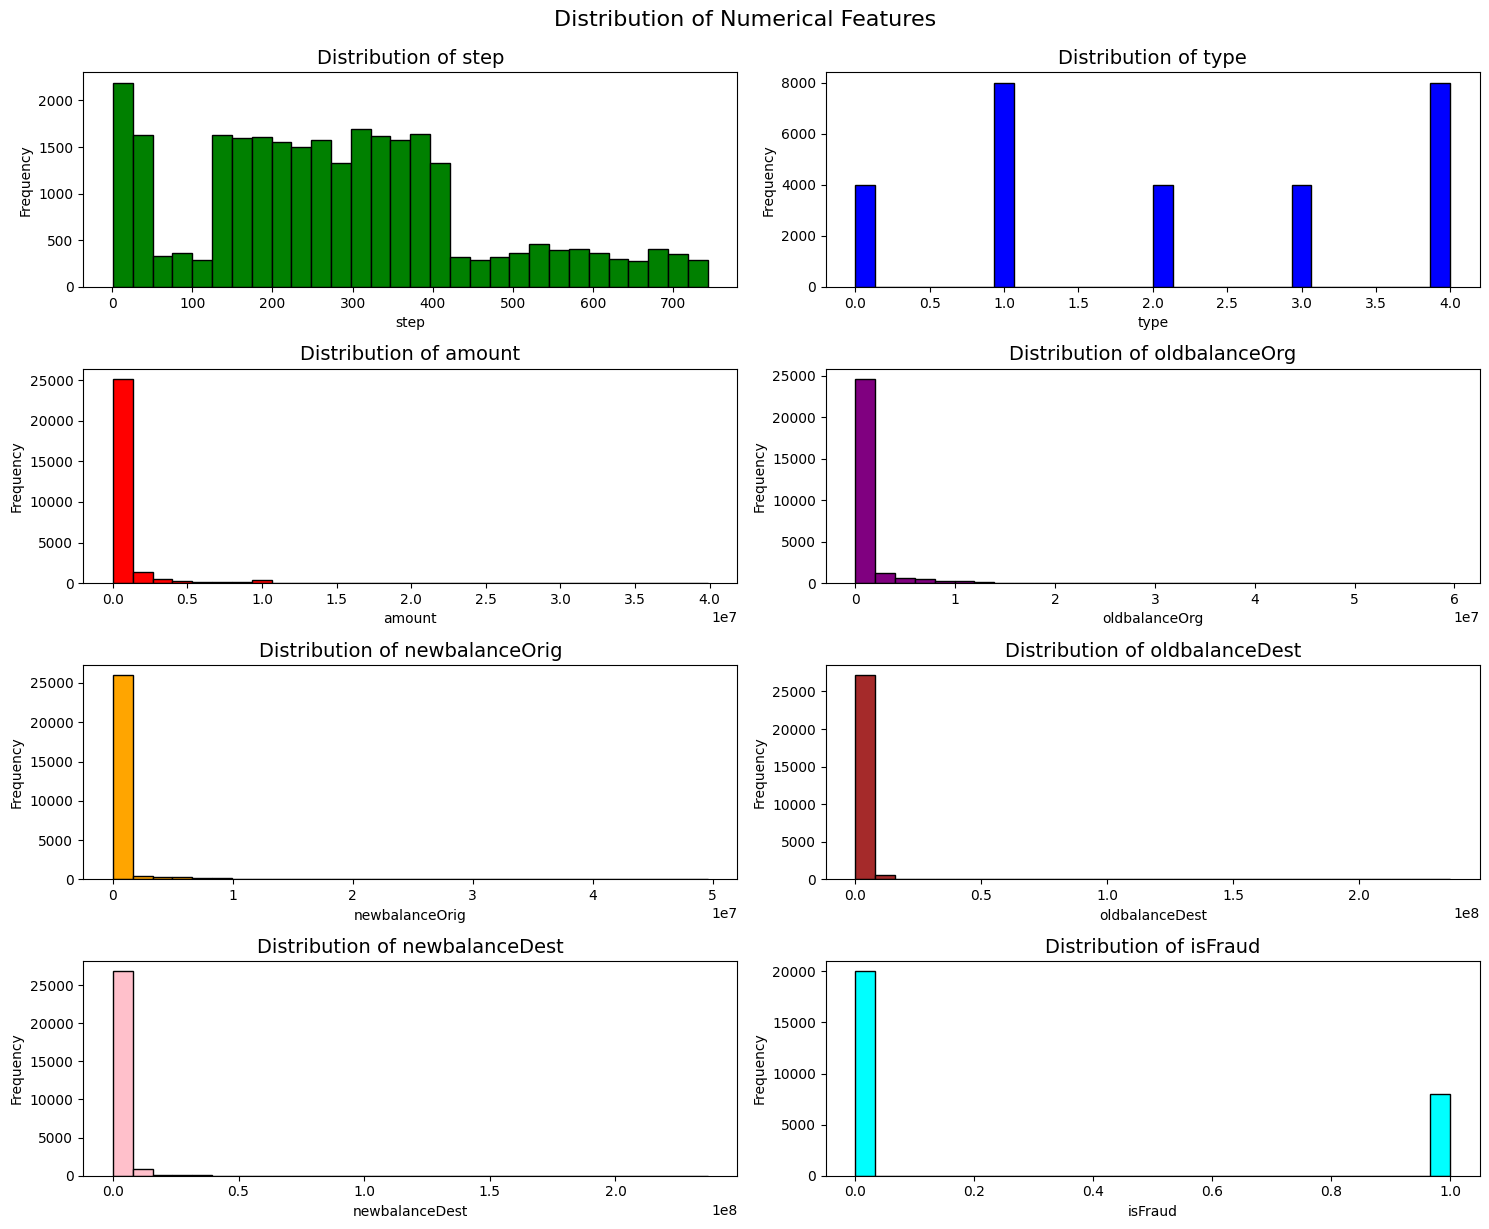

In [2]:
import matplotlib.pyplot as plt
num_cols = data.select_dtypes(include=[np.number]).columns
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan']
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    plt.hist(data[col], bins=30, color=colors[i], edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)  # Super title for the whole plot
plt.show()

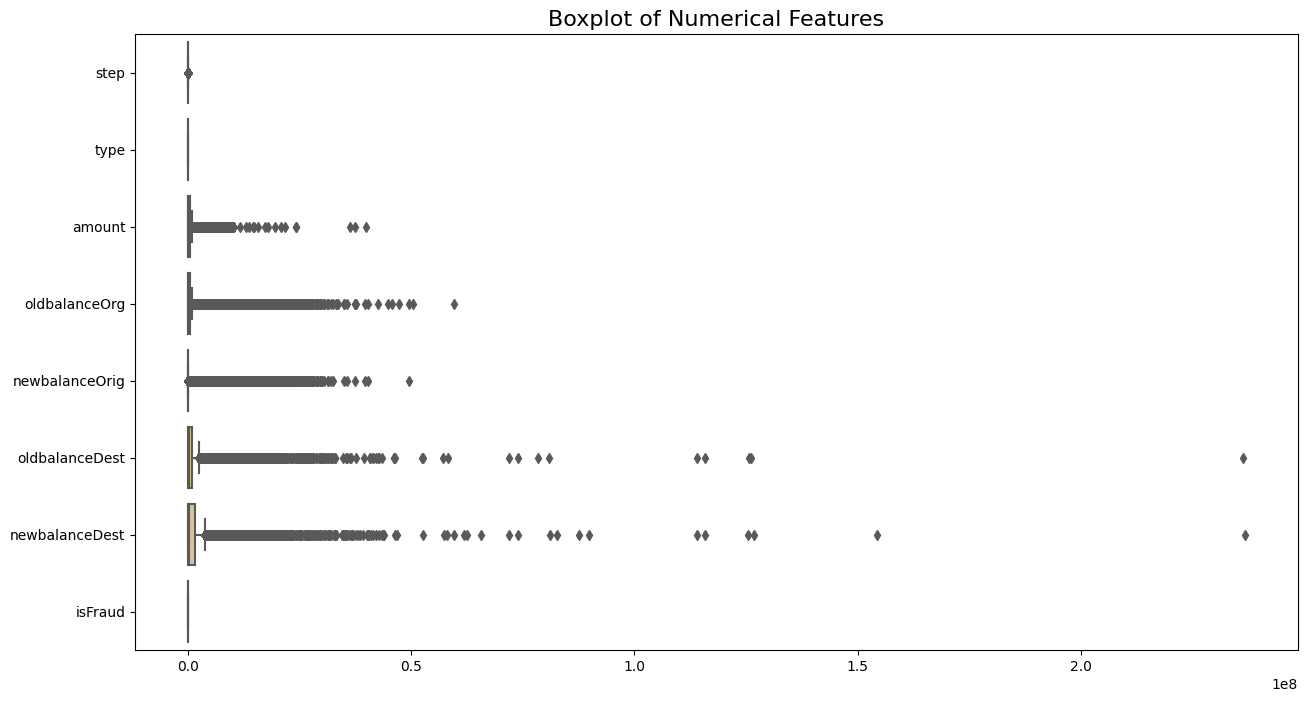

In [3]:
# Boxplot to detect outliers for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[num_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features", fontsize=16)
plt.show()

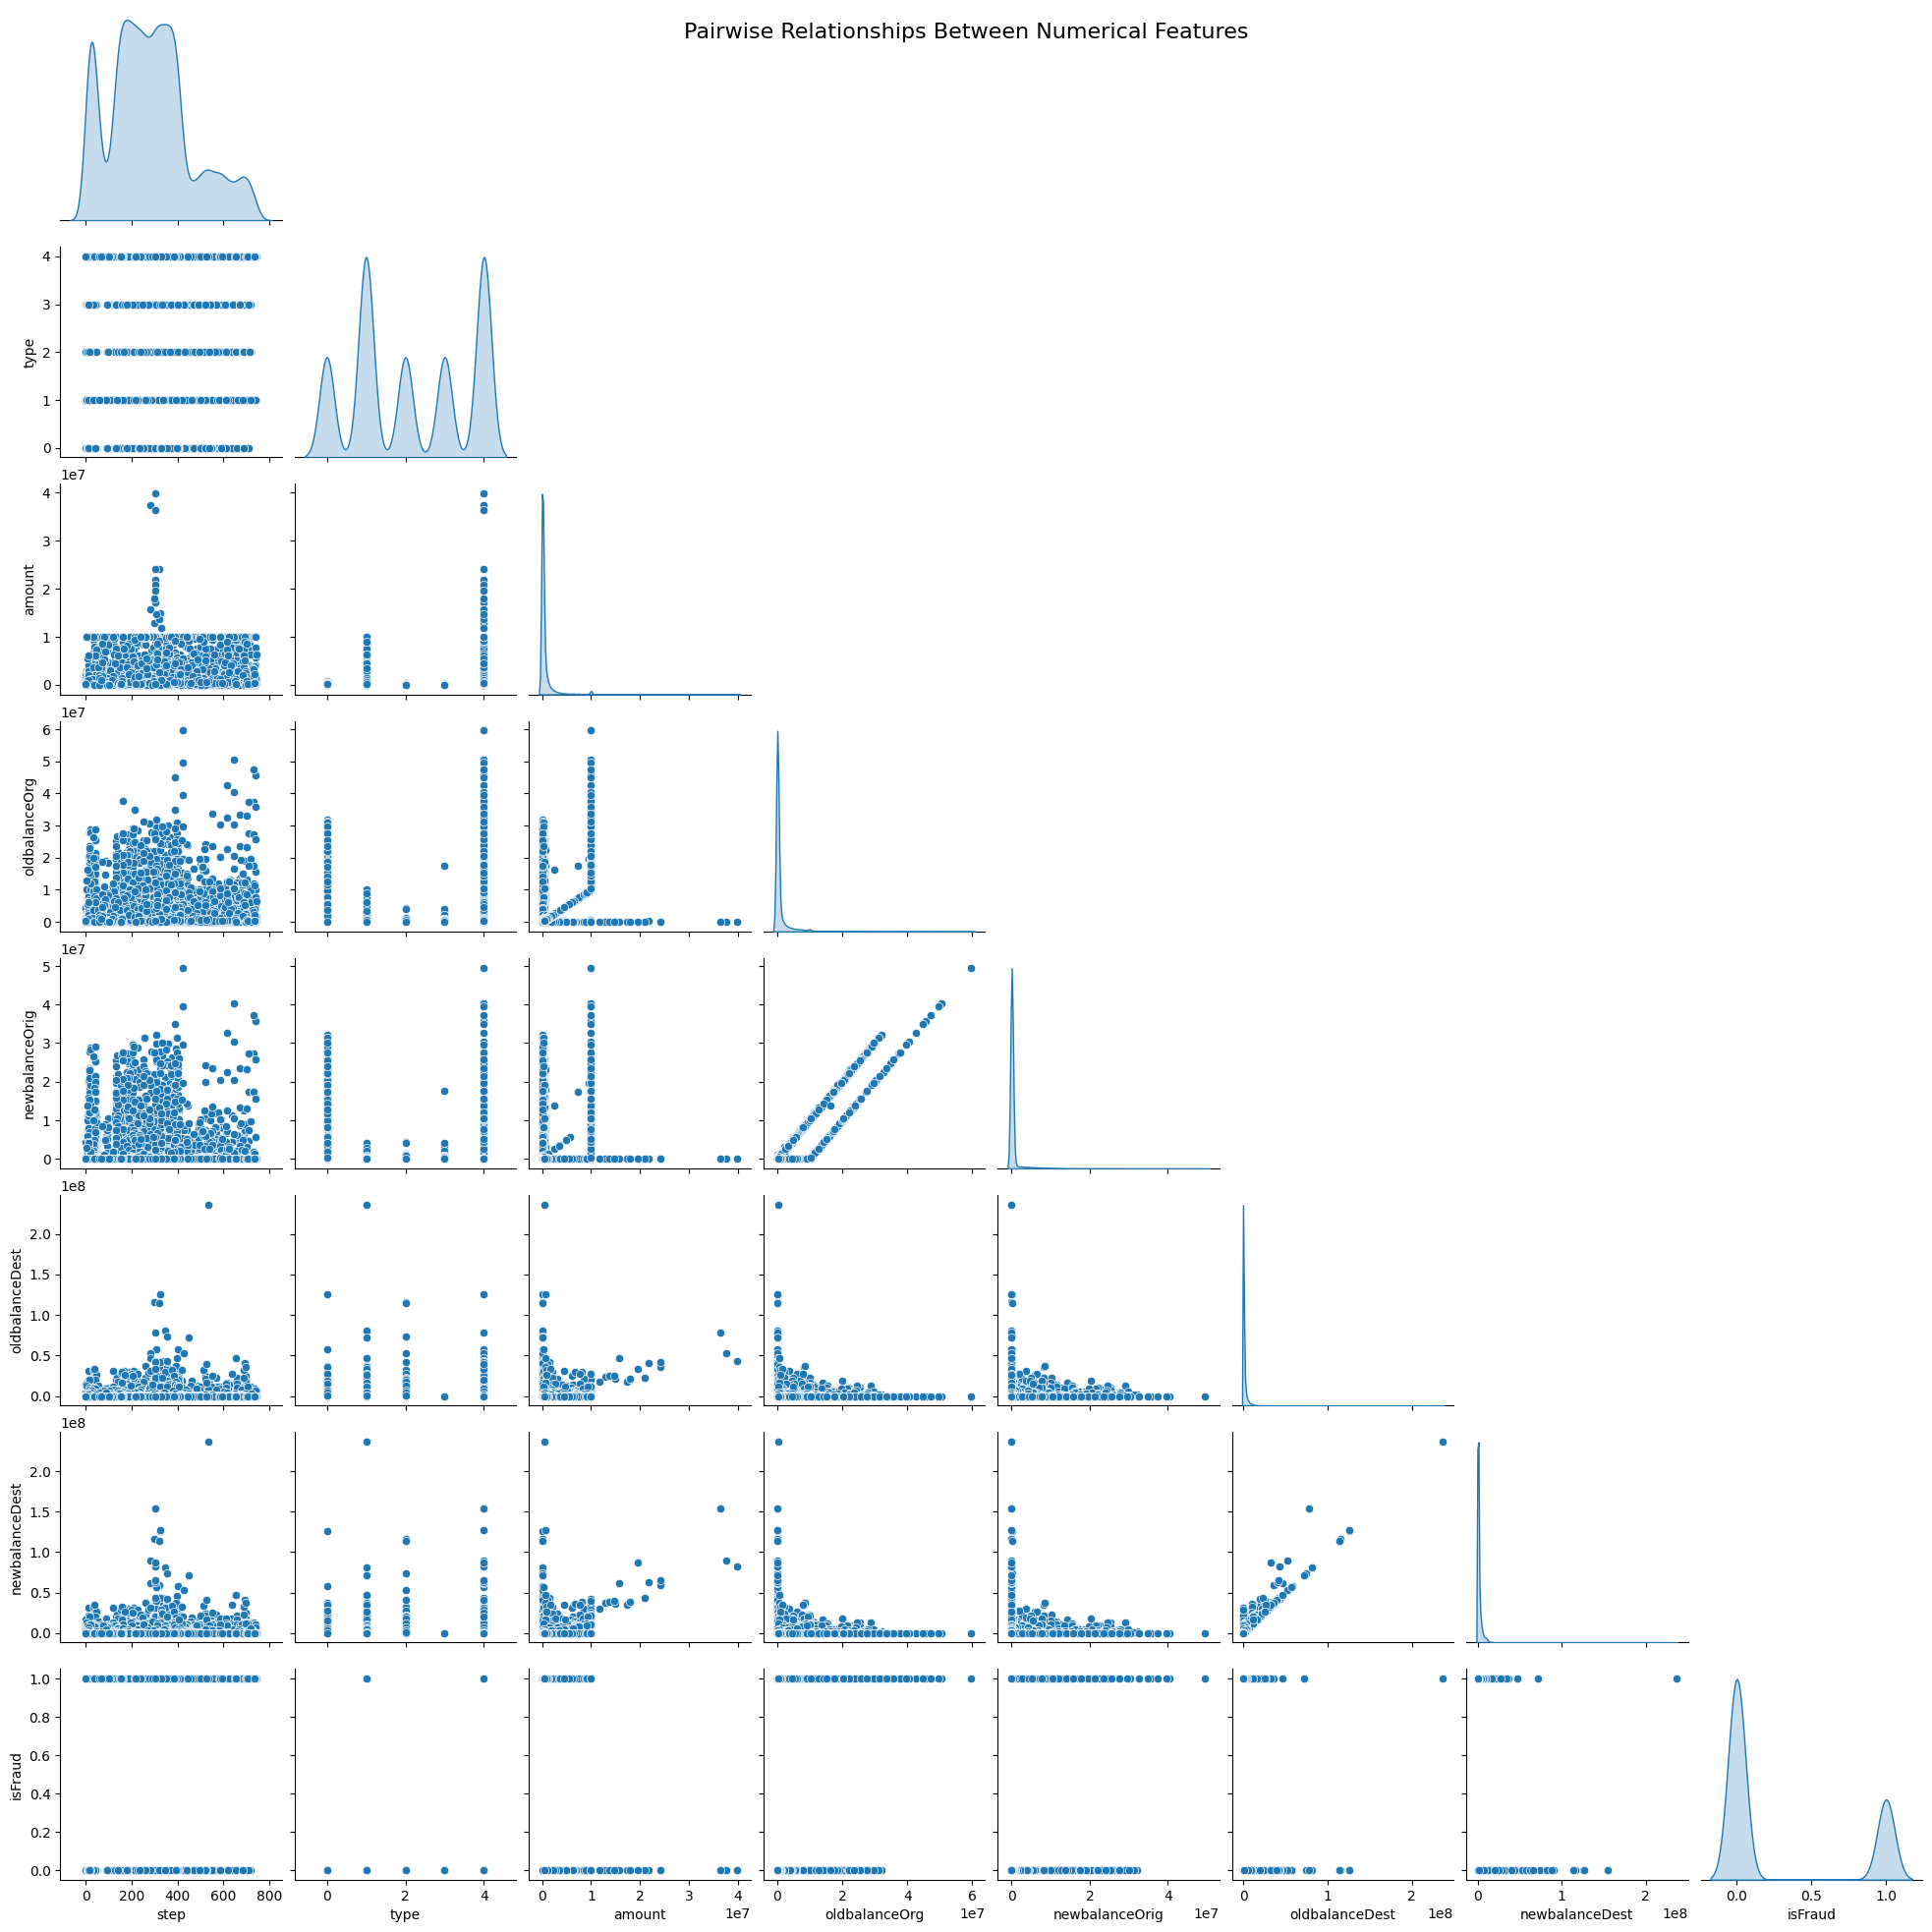

In [6]:
# Pairplot for relationships between numerical features
sns.pairplot(data[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Features", fontsize=16)
plt.show()
     


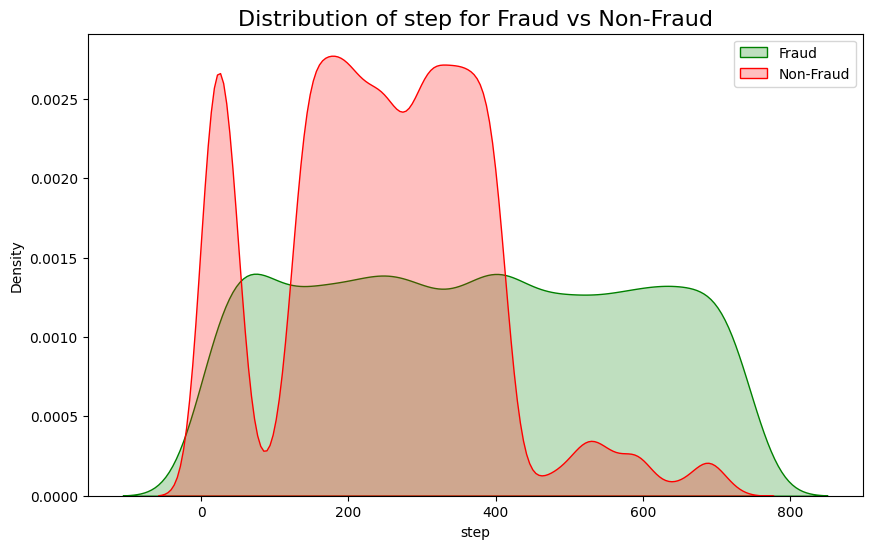

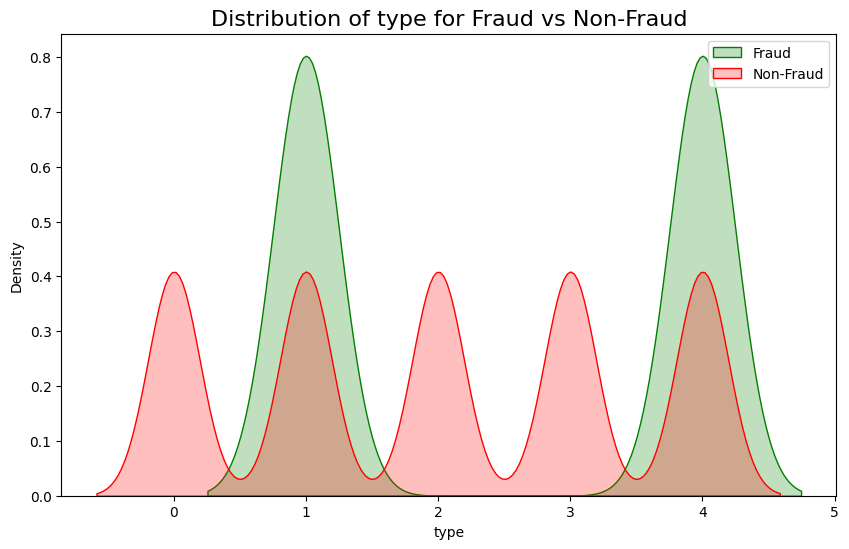

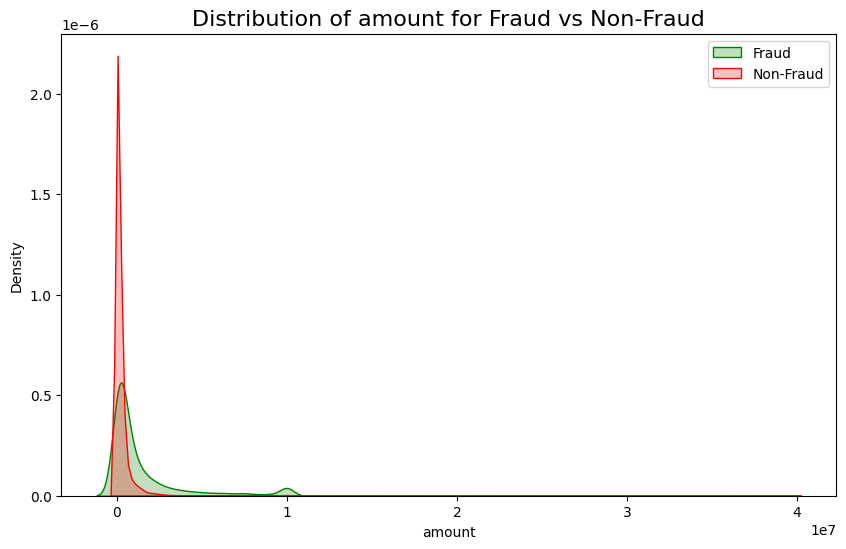

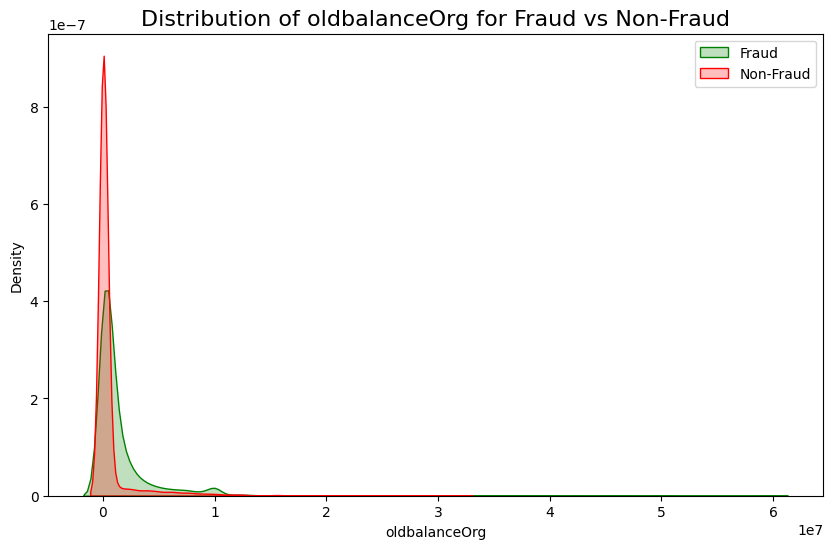

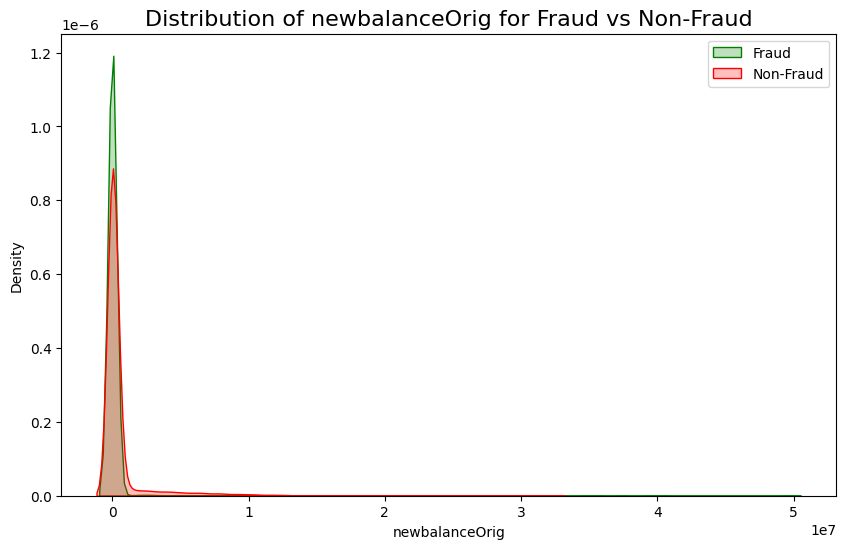

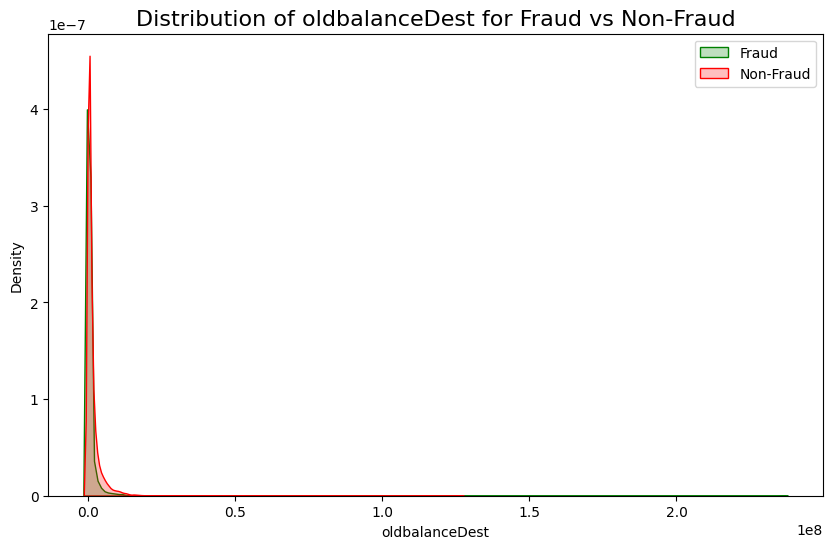

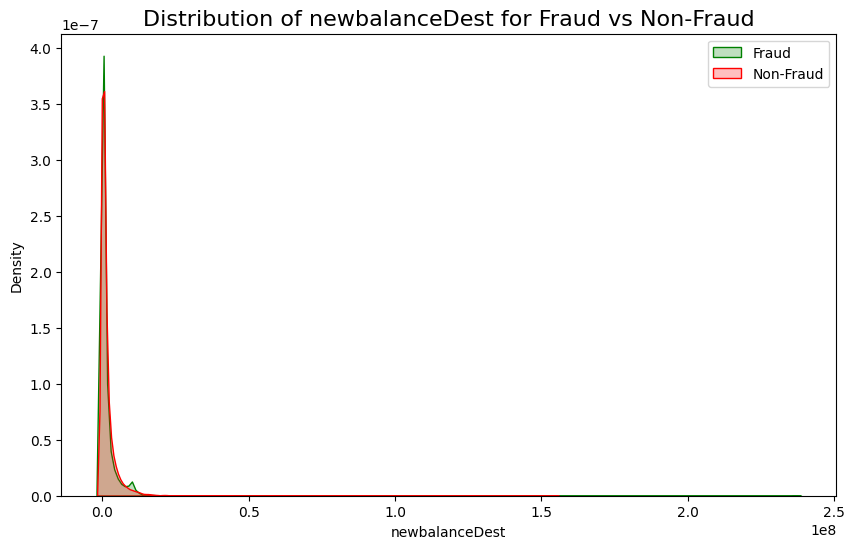

Skipping plot for isFraud: Not enough variability in the data.


<Figure size 1000x600 with 0 Axes>

In [7]:
# Step 5: Fraud vs Non-Fraud Comparison
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]
for col in num_cols:
    plt.figure(figsize=(10, 6))
    if fraud_data[col].nunique() > 1 and non_fraud_data[col].nunique() > 1:
        sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
        sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')
        plt.title(f'Distribution of {col} for Fraud vs Non-Fraud', fontsize=16)
        plt.legend()
        plt.show()
    else:
        print(f"Skipping plot for {col}: Not enough variability in the data.")

In [8]:
for col in num_cols:
    data[f'Zscore_{col}'] = np.abs(stats.zscore(data[col]))
    outliers = data[data[f'Zscore_{col}'] > 3]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

Number of outliers in step: 0
Number of outliers in type: 0
Number of outliers in amount: 752
Number of outliers in oldbalanceOrg: 534
Number of outliers in newbalanceOrig: 616
Number of outliers in oldbalanceDest: 347
Number of outliers in newbalanceDest: 314
Number of outliers in isFraud: 0
